In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import defaultdict
import argparse
import sys
import gzip
from scipy import stats
import scipy as sp
import community

from network_ei import *
from get_motifs import *

import matplotlib.patches as mpatches
from matplotlib import gridspec
from matplotlib._png import read_png
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

%matplotlib inline

# Causal Structure as a Network: Quantifying Certainty in Complex Systems

# Chapter 01: Effective Information in Networks

## Networks and Causal Structure
Despite its ubiquity in science, how to formalize and quantify causation remains mysterious, particularly for complex systems. Here we demonstrate that causal structure can be studied in a general manner via tools from network science. This is done by representing causal structures as networks and then analyzing the information (and uncertainty) contained in the paths over the nodes and connections. Specifically, we extend a metric known as *effective information* to all networks generally. Previously, effective information has been used in systems of neurons and logic gates, where it has been shown to encapsulate uncertainty about preceding states and subsequent states. We show that the effective information of a causal structure is the absence of noise in random walks over its nodes and edges. This novel global network property has elegant expressions in canonical networks. Additionally, we demonstrate that causal relationships are network motifs within causal structures, and that this analysis captures the defining aspects of causal relationships. Lastly, we describe how the emergence of higher-level causal structure is possible. These findings open the door for the exhaustive mathematical classification and quantification of the causal structure of complex systems using network science and information theory.
_____________________________________________

## Causation and Information
There are deep commonalities between causation and information. An explicit mathematical connection between the two was demonstrated when *effective information*, an information metric originally introduced as a step in the calculation of integrated information in the brain (Tononi, 2001), was shown to capture fundamental causal properties, such as *determinism* and *degeneracy* (Hoel, Albantakis, & Tononi, 2013). Stating the connection in plain language: a causal relationship is informative if the effect is a certain consequence of the cause (determinism), and if the cause is necessary for the effect (non-degenerate). More recently it was demonstrated that causal structures can themselves be viewed as information channels and, analogously, sets of interventions and their effects can be represented as the input/output of such channels (Hoel, 2017). The ultimate claim is that both causation and information are functions of noise, or uncertainty, over inputs/outputs.

Here, we use the uncovered association between information and causation to develop a general classification of causal structures as networks. What we observe is a deep connection between a causal structure's properties as a network and the uncertainty in its relationship between causes and effects (its effective information). This allows us to examine how well-suited a given network representation is for modeling relational dependencies in a given system. Specifically, we show that for certain network structures, a macro-level description of the network can be more informative, adding certainty about cause and effect relationships, demonstrating *causal emergence*.
_____________________________________________

## Effective Information
While not all networks are causal structures, all causal structures are networks. We define a causal structure as a network with $E$ weighted edges connecting $N$ nodes. All causal structures carry information, which is a function of the certainty in its causal relationships, which is in turn a function of the connectivity of the network and the weights or probabilities associated with those connections. As a metric of this informativeness, we introduce a novel generalized definition of the effective information ($EI$) for a given network as the average Kullback-Leibler (KL) Divergence between the out-weights from $\text{node}_{i}$, $W_{ij}$, and the in-weight distribution of the network,

Here, we define the $EI$ of a given network using two vectors, $W^{out}_{i}$ and $W^{in}$. The first vector $W^{out}_{i}$ consists of normalized weights $w_{ij}$ between node $v_i$ and its neighbors $v_j$, where $w_{ij}=0.0$ if there is no edge from $v_i$ to $v_j$. The second vector $W^{in}$ consists of elements that are the sum of the in-weights $w_{ij}$ to each node $v_j$ from each incoming neighbor $v_i$ (normalized by the number of nodes with output, $N_{out}$).

\begin{align*}
    W^{out}_{i} &= (w_{i1}, w_{i2},,... w_{ij}, ... w_{iN}) \hspace{2.05cm} \displaystyle\sum_{j=1}^N w_{ij}=1.0 \hspace{1.00cm} \displaystyle\sum_{i=1}^N\displaystyle\sum_{j=1}^N w_{ij} = N_{out}\\ 
    W^{in} &= (W_{1}^{in}, W_{2}^{in},... W_{j}^{in},... W_{N}^{in}) \hspace{1.45cm} W_{j}^{in} = \dfrac{1}{N_{out}} \cdot \displaystyle \sum_{i=1}^N w_{ij} 
\end{align*}

The $EI$ of a given network is the average Kullback-Leibler (KL) Divergence between the $W^{out}_{i}$ vector of each node $v_i$ and the $W^{in}$ of the network (averaging over the number of nodes with output, $N_{out}$, where $N_{out}=N$ in a strongly-connected network). 

\begin{equation} 
\begin{split}
    EI_{net} &= \dfrac{1}{N_{out}} \cdot \displaystyle \sum_{i=1}^{N_{out}} \text{D}_{_{KL}}[W^{out}_{i} || W^{in}] \\%\hspace{1.8cm} \text{where } \hspace{0.1cm} \text{D}_{_{KL}}[W^{out}_{i} || W^{in}] \neq \text{D}_{_{KL}}[W^{in} || W^{out}_{i}] \hspace{0.1cm}\text{ and }\hspace{0.1cm} \text{D}_{_{KL}}[W^{out}_{i} || W^{in}]>0\\
    EI_{net} &= \dfrac{1}{N_{out}} \cdot \displaystyle \sum_{i=1}^{N_{out}}\Bigg(\displaystyle \sum_{j=1}^{N} w_{ij}\text{log}_2\bigg(\dfrac{w_{ij}}{W^{in}_{j}}\bigg)\Bigg)
\end{split}
\end{equation}

The edge weight $w_{ij}$ from nodes $v_i$ to $v_j$ can either be of uniform probability (a weight of $\frac{1}{k_i}$, where $k_i$ is the number of outgoing edges from $v_i$) or of heterogeneous weight. In order to generalize this equation and our results to multiple types of representations, we assume that $W^{out}_{i}$ sums to $1.00$, meaning the edge weights $w_{ij}$ can be interpreted as the probability $p_{ij}$ that a random walker on $v_i$ will transition to $v_j$. If a network's edges encode strength or weighted degrees of influence between units and does not already sum to $1.00$, then we create $W^{out}_{i}$ by normalizing each node's vector of out-weights. Lastly, since only nodes with outgoing edges can produce causes in a network, we divide by $N_{out}$ in order to arrive at our final $EI$ value for a given network.

Networks with high $EI$ contain more certainty about the possible cause and effect relationships between entities in the network, whereas networks with low $EI$ contain more noise. This distinction between networks with high and low $EI$ can be shown by observing the effects of \textit{interventions} onto the networks. Here an intervention, denoted as $do_{net}(v_i)$, is defined as the introduction of a random walker on a specific $v_i$ in a network. 

\begin{align}
    do_{net}(v_i) \implies \text{initiation of a Markov process, introducing a random walker onto a specific} \\
    \text{node } v_i \text{ that transitions from } v_i \text{ to any neighboring node } v_j \text{ with } p=p_{ij}=w_{ij} \nonumber
\end{align}

For any given node there is uncertainty about a random walker's next location following an intervention $do_{net}(v_i)$. If $w_{ij}=1.0$ between $v_i$ and $v_j$, we would be certain about the effect of an intervention into $v_i$. Conversely if $v_i$ had out-edges to $N-1$ nodes, each with $w_{ij}=\frac{1}{N-1}$, we would be maximally uncertain about the effects of an intervention onto $v_i$. 

## 1.0 Create a Few Example Transition-Probability Matrices

In [2]:
p0=np.exp(-30)

In [3]:
def define_TPM(matType="copycopy", asnx=False, noise=0.0):
    """Defines a transition probability matrix, default is 
    TPM from two deterministic copy gates."""
    if matType=="copycopy":
        tpm = np.array([[1.0,0,0,0],
                        [0,0,1.0,0],
                        [0,1.0,0,0],
                        [0,0,0,1.0]])
    if matType=="andand":
        tpm = np.array([[1.0,0,0,0],
                        [1.0,0,0,0],
                        [1.0,0,0,0],
                        [0,0,0,1.0]])
        
    if matType=="oror":
        tpm = np.array([[1.0,0,0,0],
                        [0,0,0,1.0],
                        [0,0,0,1.0],
                        [0,0,0,1.0]])

    if matType=="orcopy":
        tpm = np.array([[1.0,0,0,0],
                        [0,0,1.0,0],
                        [0,0,0,1.0],
                        [0,0,0,1.0]])

    if matType=="star":
        tpm = np.array([[1.0,0,0,0],
                        [1.0,0,0,0],
                        [1.0,0,0,0],
                        [1.0,0,0,0]])

    if noise > 0.0:
        tpm += noise
        rowsums = np.sum(tpm, 1)
        tpm = np.array([tpm[i]/rowsums[i] for i in 
                        range(len(tpm))])
        
    if asnx:
        G = nx.from_numpy_matrix(tpm, create_using=nx.DiGraph())
        return G
    
    return tpm

def add_noise(G, noise=0.01, return_G=False):
    if type(G)==np.ndarray:
        G = nx.from_numpy_matrix(G, create_using=nx.DiGraph())
    elif type(G)==nx.classes.graph.Graph:
        G = nx.DiGraph(G)
    
    A = nx.adjacency_matrix(G)
    A = A.toarray() 
    A = A + noise
    rowsums = np.sum(A, 1)
    A = np.array([A[i]/rowsums[i] for i in range(len(A))])
    if return_G:
        return nx.from_numpy_array(A, create_using=nx.DiGraph())
    else:
        return A
    
def check_network(G):
    """
    Checks to make sure G is a directed networkx object.
    """
    if type(G)==np.ndarray:
        G = nx.from_numpy_matrix(G, create_using=nx.DiGraph())
    elif type(G)==nx.classes.graph.Graph:
        G = nx.DiGraph(G)    
    
    return G

## 1.1 Useful Preliminary Functions

In [4]:
def get_Wout(G, p0=np.exp(-30)):
    """
    Returns Wout, the transition probability matrix of a graph G, 
    ***only including nodes with outgoing edges***.
    """
    G = check_network(G)
    A = nx.to_numpy_array(G) 
    A = A[~np.all(A == 0, axis=1)]
    
    Wout = A/A.sum(axis=1)[:,None]
    if Wout.shape[0] > 0:
        for i in range(Wout.shape[0]):
            temp = Wout[i] + np.random.uniform(0, p0, size=Wout[i].shape)
            Wout[i] = temp/temp.sum()

        return Wout
    else:
        return np.zeros((G.number_of_nodes(),G.number_of_nodes()))

def get_Wout_full(G, p0=np.exp(-30)):
    """
    Returns full Wout.
    """
    G = check_network(G)
    A = nx.to_numpy_array(G) 
    Wout = np.zeros(A.shape)
    for i in range(A.shape[0]):
        if A[i].sum()>0:
            Wout[i] = A[i]/A[i].sum()
    
    for i in range(Wout.shape[0]):
        if A[i].sum()>0:
            temp = Wout[i] + np.random.uniform(0, p0, size=Wout[i].shape)
            Wout[i] = temp/temp.sum()
    
    return Wout

def get_Win(G, p0=np.exp(-30)):
    """
    Returns W_in, the average probility that a random walker 
    transitions to a node_j in the next timestep.
    """
    W_out = get_Wout(G, p0)
    if sum(W_out.sum(axis=0))!=0.0:
        return W_out.sum(axis=0)/sum(W_out.sum(axis=0))
    else:
        return np.zeros(len(W_out[0]))

## 1.2 Effective Information *from the Effect Information*

In [10]:
def get_ei_i(G, p0=np.exp(-20)):
    "Calculates effect information for each node in a given network."
    W_out = get_Wout(G, p0)
    W_in  = get_Win( G, p0)
    N_out = W_out.shape[0]

    if N_out > 0 and sum(sum(W_out))>0:
        return np.array([sp.stats.entropy(W_outi, W_in, base=2) for W_outi in W_out])

    else:
        return np.zeros(W_out.shape[0])

def get_ei(G, p0=np.exp(-20)):
    "Calculates EI for a given network."
    eis = get_ei_i(G,p0)
    Nout = len(eis)
    if Nout == 0 or sum(eis)==0:
        return 0.0

    return sum(eis)/Nout

## 1.3 Effective Information *from the Determinism & Degeneracy*

In [11]:
def get_determinism(G, p0=np.exp(-30)):
    """Returns the determinism present in the network."""
    G = check_network(G)
    N = G.number_of_nodes()
    W_out = get_Wout(G, p0)
    N_out = W_out.shape[0]
    if W_out.shape[0] > 0 and sum(sum(W_out)) > 0:
        return np.log2(N) - sum([sp.stats.entropy(W_outi, base=2) 
                                 for W_outi in W_out])/N_out

    else:
        return 0.0
    
def get_degeneracy(G, p0=np.exp(-30)):
    """Returns the value for the degeneracy of the network."""      
    G = check_network(G)
    N = G.number_of_nodes()
    W_in = get_Win(G, p0)
    if sum(W_in) > 0:
        return np.log2(N) - sp.stats.entropy(W_in, base=2)

    else:
        return 0.0

def get_ei_dd(G, p0=np.exp(-30)):
    """Returns the effective information of the network 
    from determinism & degeneracy."""
    G = check_network(G)
    return get_determinism(G, p0) - get_degeneracy(G, p0)

## 1.4 Miscellaneous

In [12]:
def plot_four_TPMS(tpm0, tpm1, tpm2, tpm3, labels=[], save=False):
    """A cute lil plotting function for plotting four TPMs."""
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(17,4))
    ax0.imshow(tpm0, cmap="GnBu")
    ax1.imshow(tpm1, cmap="Oranges")
    ax2.imshow(tpm2, cmap="YlGn")
    ax3.imshow(tpm3, cmap="RdPu")

    if labels:
        ax0.set_title(labels[0], size=17, fontweight="heavy")
        ax1.set_title(labels[1], size=17, fontweight="heavy")
        ax2.set_title(labels[2], size=17, fontweight="heavy")
        ax3.set_title(labels[3], size=17, fontweight="heavy")

    else:
        ax0.set_title("Copy-Copy\n", size=15)
        ax1.set_title("And-And\n", size=15)
        ax2.set_title("Or-Or\n", size=15)
        ax3.set_title("Star\n", size=15)
    
    ax0.set_xticks(np.arange(0, 4, 1));
    ax0.set_yticks(np.arange(0, 4, 1));
    ax0.set_xticklabels(np.arange(0, 4, 1));
    ax0.set_yticklabels(np.arange(0, 4, 1));
    ax0.set_xticks(np.arange(-.5, 3.5, 1), minor=True);
    ax0.set_yticks(np.arange(-.5, 3.5, 1), minor=True);
    ax0.grid(which='minor', color='darkgrey', linestyle='-', linewidth=3)
    ax0.xaxis.tick_top()

    ax1.set_xticks(np.arange(0, 4, 1));
    ax1.set_yticks(np.arange(0, 4, 1));
    ax1.set_xticklabels(np.arange(0, 4, 1));
    ax1.set_yticklabels(np.arange(0, 4, 1));
    ax1.set_xticks(np.arange(-.5, 3.5, 1), minor=True);
    ax1.set_yticks(np.arange(-.5, 3.5, 1), minor=True);
    ax1.grid(which='minor', color='darkgrey', linestyle='-', linewidth=3)
    ax1.xaxis.tick_top()

    ax2.set_xticks(np.arange(0, 4, 1));
    ax2.set_yticks(np.arange(0, 4, 1));
    ax2.set_xticklabels(np.arange(0, 4, 1));
    ax2.set_yticklabels(np.arange(0, 4, 1));
    ax2.set_xticks(np.arange(-.5, 3.5, 1), minor=True);
    ax2.set_yticks(np.arange(-.5, 3.5, 1), minor=True);
    ax2.grid(which='minor', color='darkgrey', linestyle='-', linewidth=3)
    ax2.xaxis.tick_top()

    ax3.set_xticks(np.arange(0, 4, 1));
    ax3.set_yticks(np.arange(0, 4, 1));
    ax3.set_xticklabels(np.arange(0, 4, 1));
    ax3.set_yticklabels(np.arange(0, 4, 1));
    ax3.set_xticks(np.arange(-.5, 3.5, 1), minor=True);
    ax3.set_yticks(np.arange(-.5, 3.5, 1), minor=True);
    ax3.grid(which='minor', color='darkgrey', linestyle='-', linewidth=3)
    ax3.xaxis.tick_top()

    if save:
        plt.savefig("FourSampleTPMS.png", dpi=300, bbox_inches='tight')
    plt.show()

# 1.5 Testing Sample Networks

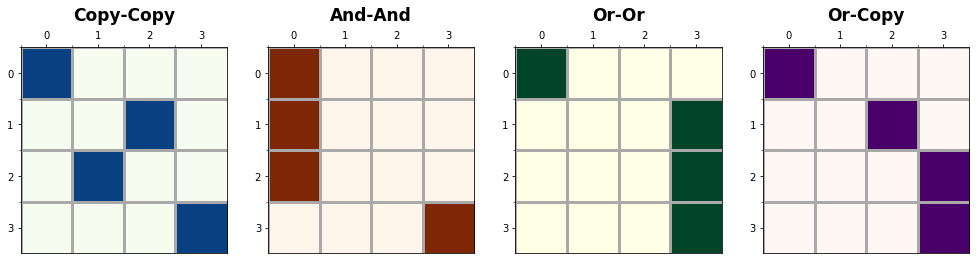

In [13]:
A = np.array([[1.0,0,0,0],[0,0,1.0,0],[0,0,0,1.0],[0,0,0,1.0]])
labels=["Copy-Copy\n", "And-And\n", "Or-Or\n", "Or-Copy\n"]
save = False
plot_four_TPMS(define_TPM("copycopy"), define_TPM("andand"), 
               define_TPM("oror"), A, labels, save)

### 1.5.10 Copy-Copy

In [14]:
print("Copy-Copy Network:")
A = np.array([[1.0,0,0,0],[0,0,1.0,0],[0,1.0,0,0],[0,0,0,1.0]])
print(A)
print(" ")
print("\tEffective Information (EI): \t", np.round(get_ei(A), 6))
print("\tEffective Information (DD): \t", np.round(get_ei_dd(A), 6))

Copy-Copy Network:
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
 
	Effective Information (EI): 	 2.0
	Effective Information (DD): 	 2.0


### 1.5.11 And-And

In [15]:
print("And-And Network:")
A = np.array([[1.0,0,0,0],[1.0,0,0,0],[1.0,0,0,0],[0,0,0,1.0]])
print(A)
print(" ")
print("\tEffective Information (EI): \t", np.round(get_ei(A), 6))
print("\tEffective Information (DD): \t", np.round(get_ei_dd(A), 6))

And-And Network:
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
 
	Effective Information (EI): 	 0.811278
	Effective Information (DD): 	 0.811278


### 1.5.2 Copy-Copy (with noise, 1.00 changed to 0.97)

In [16]:
print("Noisy Copy-Copy Network:")
A = np.array([[0.97,0.01,0.01,0.01],[0.01,0.01,0.97,0.01],
              [0.01,0.97,0.01,0.01],[0.01,0.01,0.01,0.97]])
print(A)
print(" ")
print("\tEffective Information (EI): \t", np.round(get_ei(A), 6))
print("\tEffective Information (DD): \t", np.round(get_ei_dd(A), 6))

Noisy Copy-Copy Network:
[[0.97 0.01 0.01 0.01]
 [0.01 0.01 0.97 0.01]
 [0.01 0.97 0.01 0.01]
 [0.01 0.01 0.01 0.97]]
 
	Effective Information (EI): 	 1.758059
	Effective Information (DD): 	 1.758059


### 1.5.3 Or-Copy

In [17]:
print("Or-Copy Network:")
A = np.array([[1.0,0,0,0],[0,0,1.0,0],[0,0,0,1.0],[0,0,0,1.0]])
print(A)
print(" ")
print("\tEffective Information (EI): \t", np.round(get_ei(A), 6))
print("\tEffective Information (DD): \t", np.round(get_ei_dd(A), 6))

Or-Copy Network:
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
 
	Effective Information (EI): 	 1.5
	Effective Information (DD): 	 1.5


### 1.5.4 Random Matrices

In [18]:
print("Random Matrix:")
pp = np.random.rand(4,4)
pp = np.array([pp[i]/sum(pp[i]) for i in range(len(pp))])
print(pp)
print(" ")
print("\tEffective Information (EI): \t", np.round(get_ei(pp), 6))
print("\tEffective Information (DD): \t", np.round(get_ei_dd(pp), 6))

Random Matrix:
[[0.37683652 0.0006459  0.32427878 0.29823881]
 [0.18404986 0.23242761 0.3349183  0.24860423]
 [0.34265884 0.14675147 0.32477917 0.18581052]
 [0.06026785 0.29078429 0.43005704 0.21889082]]
 
	Effective Information (EI): 	 0.142095
	Effective Information (DD): 	 0.142095


## End of Chapter 01. In Chapter 02, we will look at the $EI$ of prototypical networks
_______________

### References:
- __[Hoel, E. P. (2017). When the Map Is Better Than the Territory. Entropy, 19(5), 188. doi: 10.3390/e19050188](http://www.mdpi.com/1099-4300/19/5/188)__
- __[Hoel, E. P., Albantakis, L., & Tononi, G. (2013). Quantifying causal emergence shows that macro can beat micro. Proceedings of the National Academy of Sciences, 110(49), 19790–5. doi: 10.1073/pnas.1314922110](http://www.pnas.org/content/110/49/19790)__
- __[Tononi, G. (2001). Information measures for conscious experience. Archives Italiennes de Biologie,139(4), 367–371.  doi: 10.4449/aib.v139i4.51](https://www.ncbi.nlm.nih.gov/pubmed/11603079)__